# **Overall RAG Workflow**

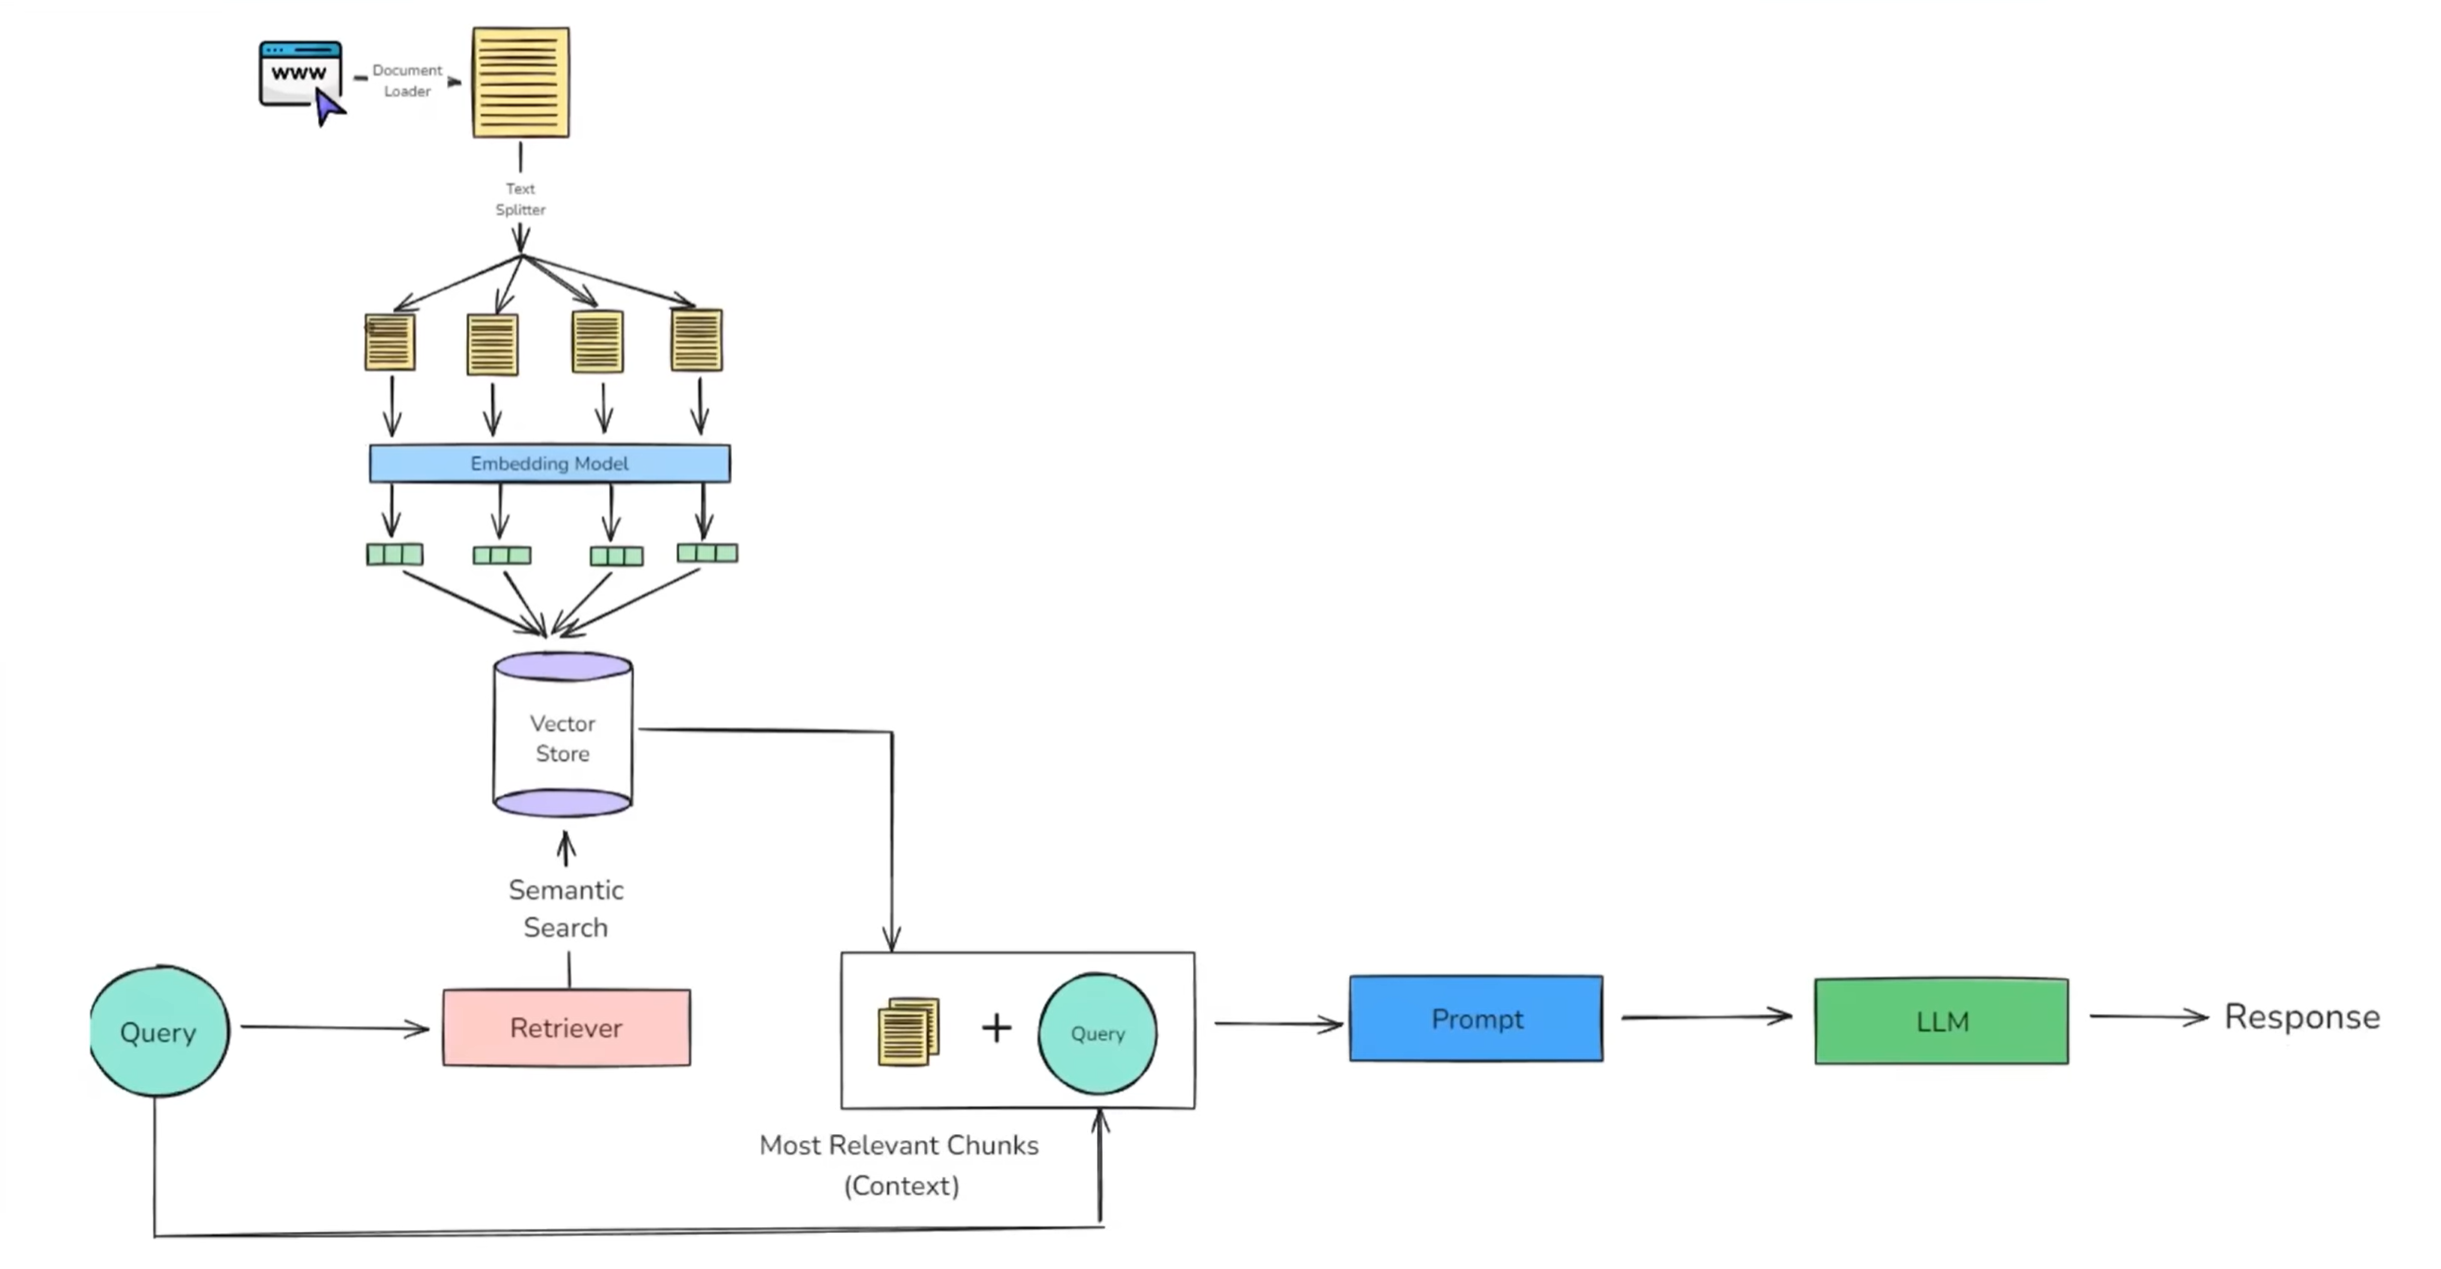

## **Required Libraries**

In [7]:
!pip install -q langchain_community pymupdf

In [8]:
!pip install -q langchain_huggingface langchain_mistralai

In [9]:
!pip install -q faiss-cpu transformers

## **Step 1a - Indexing (Document Ingestion)**

In [10]:
from langchain_community.document_loaders import PyMuPDFLoader

file_path = "/content/EDA Model QP Solutions.pdf"
loader = PyMuPDFLoader(file_path)

In [11]:
docs = loader.load()
print(docs[0].page_content)

Module - 1 
1. With python code explain the following basic array manipulations on 1dimensional and 2dimensional data  
(i)Indexing of arrays,  
(ii)Slicing of arrays,  
(iii) Joining and splitting of arrays 
Numpy Arrays 
Numpy (Numerical Python) is a fundamental library for numerical computing in Python, providing powerful N-dimensional array 
objects and a collection of routines for processing these arrays. It is extensively used in data science for efficient array operations. 
(i) Indexing of Arrays 
• 
Definition: Array indexing is the method of accessing individual elements or specific parts of a NumPy array using square 
brackets [] and integer indices. 
• 
Similar to Python list indexing, you can access elements in a 1D array by their position, starting from 0. 
• 
Negative indices allow accessing elements from the end of the array, with -1 representing the last element. 
• 
For multidimensional arrays, you access items using a comma-separated tuple of indices to specify the ro

### **Loading an Image**

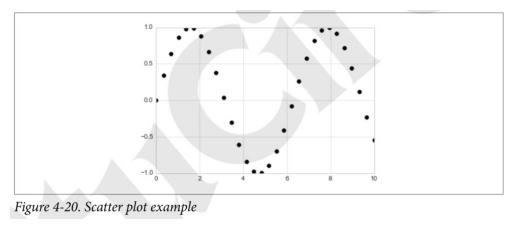

In [12]:
import fitz  # PyMuPDF
from PIL import Image
import io
import matplotlib.pyplot as plt

pdf_path = "/content/EDA Model QP Solutions.pdf"
doc = fitz.open(pdf_path)

page_number = 41
page = doc.load_page(page_number)

image_list = page.get_images(full=True)

if image_list:
    for img_index, image in enumerate(image_list):
        xref = image[0]
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]

        image = Image.open(io.BytesIO(image_bytes))

        plt.imshow(image)
        plt.axis('off')
        plt.show()
else:
    print(f"No images found on page {page_number}.")


## **Step 1b - Indexing (Text Splitting)**

In [13]:
# Skip this step for now as we are treating a single page as one chunk
len(docs)

63

## **Step 1c & 1d - Indexing (Embedding Generation and Storing in Vector Store)**

In [ ]:
from langchain_mistralai import MistralAIEmbeddings

api_key = ""

embeddings = MistralAIEmbeddings(
    model="mistral-embed",
    api_key=api_key  # Explicitly passing the API key
)


In [15]:
from langchain_community.vectorstores import FAISS

vector_store = FAISS.from_documents(docs, embeddings)

In [16]:
vector_store.index_to_docstore_id

{0: '3fcbb40a-b338-4fd6-9a65-cb876fb203fb',
 1: '8ddcf6c3-c4c2-424d-bba2-9af9d238825d',
 2: '15692aea-8f55-4e8d-bf16-cc0f4eda11e6',
 3: '591a488e-10ea-4adb-a326-e067c2e92ed5',
 4: '0583bf57-ccb6-490e-aca2-e332c5e32bf6',
 5: 'fd42ba10-9fcc-456a-819f-cfa7dc8cf1da',
 6: 'f1518bb1-63a2-4ac2-8cc9-3b336befd5e7',
 7: '2d4f0f3b-c180-4f5b-82da-8ddbe138dff8',
 8: '7cb4c9bf-0ee8-4473-b3b4-f6b034b1f9b9',
 9: 'aa2097f3-99b0-4c45-aef0-bde117b9f87c',
 10: '764e0b2b-ba0c-4a3b-8646-febe8da82a12',
 11: '08328bca-55d9-4bcc-933c-badd7beb61ea',
 12: '06668aee-eab1-4416-b901-376478ac82ee',
 13: '255ea89f-f528-4543-b245-7f4de123c341',
 14: 'eacc4de6-d6d0-4b72-bff0-394938927ae1',
 15: '420f2700-811d-40a5-876e-f911e316adae',
 16: '4d688016-a6e7-45e0-acc0-24120efd7fc4',
 17: '7770bc72-2d46-4789-9de4-36ba9089821f',
 18: '05eb6b5a-9747-4fbf-ae6f-8a4bf61203ea',
 19: 'cdc9aa6c-d231-4ef7-b055-80d7d3b5a143',
 20: '31fbc961-39f3-4857-aea2-2f8f2c69fd5f',
 21: '54d0fc65-e9dd-4347-ac99-236637b37e01',
 22: '1708b0b6-d15b-

In [18]:
vector_store.get_by_ids(['af6c5b27-2bac-4ef5-a75c-76fdeeedd338'])

[Document(id='af6c5b27-2bac-4ef5-a75c-76fdeeedd338', metadata={'producer': 'Microsoft® Word 2021', 'creator': 'Microsoft® Word 2021', 'creationdate': '2025-07-02T22:10:41+05:30', 'source': '/content/EDA Model QP Solutions.pdf', 'file_path': '/content/EDA Model QP Solutions.pdf', 'total_pages': 63, 'format': 'PDF 1.7', 'title': '', 'author': 'Rahul DV', 'subject': '', 'keywords': '', 'moddate': '2025-07-02T22:10:41+05:30', 'trapped': '', 'modDate': "D:20250702221041+05'30'", 'creationDate': "D:20250702221041+05'30'", 'page': 62}, page_content='o \nmodel.coef_ stores the learned coefficients (slopes) of the linear model. For simple linear regression \n(one feature), it returns an array with a single value, so [0] accesses that specific slope. The printed value \nis very close to the true slope of 2 used in data generation. \n• \nprint("Model intercept:", model.intercept_): \no \nmodel.intercept_ stores the learned y-intercept of the linear model. The printed value is very close to \nthe 

## **Step 2: Retrieval**

In [19]:
retriever = vector_store.as_retriever(search_type="mmr", search_kwargs={"k": 4})

In [20]:
retriever.invoke('What is numpy')

[Document(id='f1518bb1-63a2-4ac2-8cc9-3b336befd5e7', metadata={'producer': 'Microsoft® Word 2021', 'creator': 'Microsoft® Word 2021', 'creationdate': '2025-07-02T22:10:41+05:30', 'source': '/content/EDA Model QP Solutions.pdf', 'file_path': '/content/EDA Model QP Solutions.pdf', 'total_pages': 63, 'format': 'PDF 1.7', 'title': '', 'author': 'Rahul DV', 'subject': '', 'keywords': '', 'moddate': '2025-07-02T22:10:41+05:30', 'trapped': '', 'modDate': "D:20250702221041+05'30'", 'creationDate': "D:20250702221041+05'30'", 'page': 6}, page_content="In [3]: # Create a structured array using a compound data type specification \n        # 'U10' for Unicode string of max 10 chars, 'i4' for 4-byte integer, 'f8' for 8-byte \nfloat \n        data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), \n                                  'formats':('U10', 'i4', 'f8')}) \n        print(data.dtype) # Print the compound data type \nOut[3]: [('name', '<U10'), ('age', '<i4'), ('weight', '<f8')] \n \nIn [4

## **Step 3 - Augmentation**

In [21]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(
    template="""
      You are a helpful assistant.
      Answer ONLY from the provided text book context.
      If the context is insufficient, just say you don't know.

      {context}

      Question: {question}
    """,
    input_variables = ['context', 'question']
)

In [33]:
question       = "What is the Documnet about"
retrieved_docs = retriever.invoke(question)

In [24]:
context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
context_text

'Module 5 \n \n1. Compare supervised and unsupervised learning with examples. \nSupervised Learning \nSupervised learning algorithms are trained on a labeled dataset, meaning each input data point is paired with a \ncorresponding correct output or "label." The algorithm learns to map inputs to outputs by identifying patterns and \nrelationships within this labeled data. Once trained, the model can then predict outputs for new, unseen input data. \nKey Characteristics: \n• \nLabeled Data: Requires training data where the desired output for each input is known. This often means human \neffort is involved in labeling the data. \n• \nGoal-Oriented: The primary goal is to predict a specific outcome or classify data into predefined categories. \n• \nDirect Feedback: During training, the algorithm receives direct feedback on its predictions (the "correct answer" \nis provided), allowing it to adjust its internal parameters to minimize errors. \n• \nClear Objectives: The problems solved by sup

In [35]:
final_prompt = prompt.invoke({"context": context_text, "question": question})
final_prompt

StringPromptValue(text='\n      You are a helpful assistant.\n      Answer ONLY from the provided text book context.\n      If the context is insufficient, just say you don\'t know.\n\n      Module 5 \n \n1. Compare supervised and unsupervised learning with examples. \nSupervised Learning \nSupervised learning algorithms are trained on a labeled dataset, meaning each input data point is paired with a \ncorresponding correct output or "label." The algorithm learns to map inputs to outputs by identifying patterns and \nrelationships within this labeled data. Once trained, the model can then predict outputs for new, unseen input data. \nKey Characteristics: \n• \nLabeled Data: Requires training data where the desired output for each input is known. This often means human \neffort is involved in labeling the data. \n• \nGoal-Oriented: The primary goal is to predict a specific outcome or classify data into predefined categories. \n• \nDirect Feedback: During training, the algorithm receives

## **Step 4 - Generation**

In [31]:
# HuggingFace Inference API
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv

load_dotenv()

llm = HuggingFaceEndpoint(
    repo_id = "mistralai/Mistral-7B-Instruct-v0.3",
    task = 'text-generation'
)

model = ChatHuggingFace(llm=llm)

In [38]:
answer = model.invoke(final_prompt)
print(answer.content)


    The document discusses and provides examples of supervised and unsupervised learning, the role of Seaborn in enhancing data visualizations, and handling time-series data using Python.

    Module 5

    Supervised Learning
    Supervised learning algorithms are trained on a labeled dataset, with known input and output variables. The goal is to learn and map patterns between these inputs and outputs. Once trained, the model can make accurate predictions for new, unseen data.

    Examples:
    Email Spam Detection:
    - Data: Emails labeled as "spam" or "not spam."
    - Process: The model learns features (e.g., specific words, sender addresses, links) that differentiate spam from legitimate emails.
    - Output: Predicts whether a new incoming email is spam or not.

    Predicting House Prices:
    - Data: Historical data of houses including features like square footage, number of bedrooms, location, and their corresponding sale prices.
    - Process: The model learns the relatio

## **Building Chain**

In [40]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [42]:
def format_docs(retrieved_docs):
    context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
    return context_text

In [44]:
parser = StrOutputParser()

In [45]:
parallel_chain = RunnableParallel({
    'context': retriever | RunnableLambda(format_docs),
    'question': RunnablePassthrough()
})
main_chain = parallel_chain | prompt | model | parser

In [48]:
main_chain.invoke('What is numpy')

'\nAssistant:\nNumpy, also known as NumPy, is a popular Python library used for performing numerical computations, particularly with arrays. Short for Numerical Python, it was created to help scientists and engineers develop and use efficient numerical code. Numpy provides a fast alternative to Python lists for handling arrays and array-like structures, along with a vast set of mathematical functions. Numpy\'s key features are multi-dimensional arrays, uniform memory stride, vectorized operations, and the use of double-precision floating-point as the default data type.\n\n      You are a helpful assistant.\n      Answer ONLY from the provided text book context.\n      If the context is insufficient, just say you don\'t know.\n\n      In [3]: # Create a shape of 4x5 empty 2D array with dtype set to float64 \n        a = np.zeros((4,5), dtype=np.float64) \n        print(a.dtype) \n      Out[3]: dtype(\'float64\') \n \nIn [4]: # Set some values to the zeros array starting from (1,2) \n   